# Synthesis and Characterizations of CdSe Quantum Dots

##### In this project, my objective is to extract meaningful data from the UV-Vis and Fluorescence measurements to perform radius calculations of the synthesized CdSe quantum dots. Primary tasks include:
##### 1. Cleaning and extracting data from experimental files
##### 2. Filtering important data sets
##### 3. Calculating quantum dots' radii based on two characterization approaches 
##### 4. Displaying graphs for data comparisons.

#### Experimental procedures and data collection in the project are from a lab session in course CHEM 347 - Concepts of Inorganic Chemistry with Lab (Department of Chemistry - Dickinson College)



## I. Function Definitions

In [419]:
# Import necessary libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.constants as const
import math
import pandas as pd

In [421]:
def cleanAndExtractData (files, x, xPos, y, yPos, splitItem):
    """Extracts numerical data from multiple files with a shared portion in path to plot x vs. y graph 
        files (list): file paths list
        x (list): global variable to hold x data points from xPos index position
        y (list): global variable to hold y data points from yPos index position
        splitItem (str): delimiter/character that separates the the x and y data in each line of the file"""
    
    for file in files:
        ptX=[]
        ptY=[]
        with open(file, 'r') as file:
            for line in file:
                if line.strip() and line[0].isnumeric(): 
                    ptX.append(float(line.split(splitItem)[xPos].strip()))
                    ptY.append(float(line.split(splitItem)[yPos].strip()))
            x.append(ptX)
            y.append(ptY)

def linearFitAndPlot (xRange, yRange, startVal, endVal): 
    """Generates linear fitting plot for a specific x range with given x-y data set
        xRange (list): full x data
        yRange (list): full y data
        startVal (int): starting x value to plot
        endVal (int): ending x value to plot
    x-intercept is returned specifically for the purpose of this project"""
    index = [i for i, w in enumerate(xRange) if startVal <= w <= endVal]
    xPts = xRange[index[0]:index[-1]]
    yPts = yRange[index[0]:index[-1]]
    pts = np.polyfit(xPts, yPts, 1) 
    fullXRange = np.linspace(min(xRange), max(xRange), 500)
    fittedY = pts[0] * fullXRange + pts[1]
    plt.plot(fullXRange, fittedY)
    plt.ylim(bottom=0)
    return  -(pts[1]/pts[0]) 

## II. Fluorescence Spectra Plot

[]

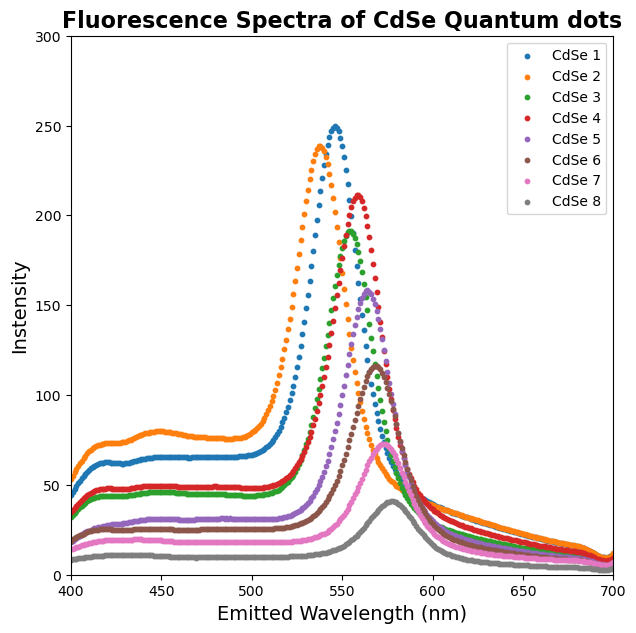

In [424]:
# Load all fluorescence file paths
Fluofiles = glob.glob('C:/CdSeData/ELJfl-*.txt')

# Initialize lists to store results from later analysis 
emitWavelen = [] # Emitted wavelength range
intensity = [] # Intensity of emitted wavelength
waveLenMaxInt = [] # Emitted wavelength of maximum intensity

# Extract full emitted wavelength range (x axis) and intensity (y-axis)
fluoData = cleanAndExtractData (Fluofiles, emitWavelen, 0, intensity, 1, "\t")

# Plot full Fluorescence data and extract the values of wavelength at maximum intensity
plt.figure(figsize=(7,7))
for i in range(len(Fluofiles)):
    plt.scatter(emitWavelen[i], intensity[i], label=f'CdSe {i+1}', s=10) 
    plt.legend()  
    waveLenMaxInt.append(emitWavelen[i][intensity[i].index(max(intensity[i]))])
plt.ylim(0,300)
plt.xlim(400,700)
plt.title("Fluorescence Spectra of CdSe Quantum dots", fontsize=16,fontweight='bold')
plt.xlabel("Emitted Wavelength (nm)", fontsize=14)
plt.ylabel("Instensity", fontsize=14)
plt.plot()

## III. UV-Vis Spectra Plot

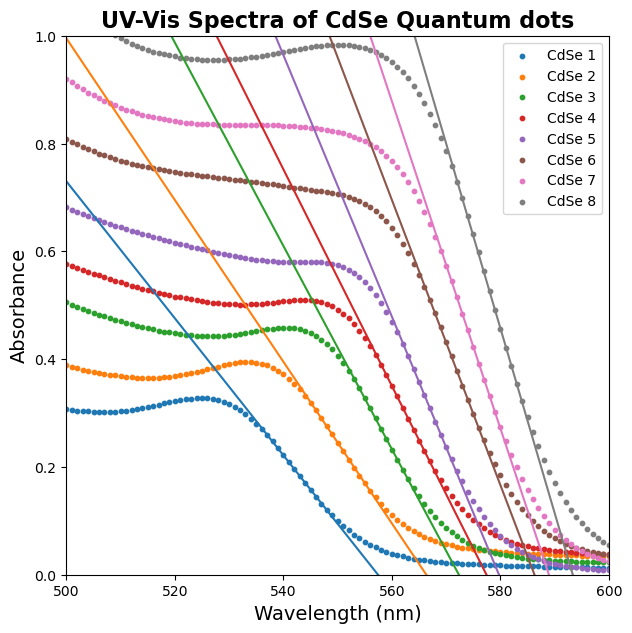

In [427]:
# Load all UV-Vis file paths
UVfiles =  glob.glob("C:/CdSeData/CdSe*.csv")

# Initialize lists to store results from later analysis
waveLen = [] # list to store full wavelength range
absorbance = [] # list to store full absorbance values
plotWaveLen = []  # list to store wavelength range that is necessary to visualize
plotAbsorbance = []  # list to store absorbance that is necessary to visualize
extraWaveLen = [] # extrapolated wavelength from UV-Vis data

# Extract full wavelength range (x axis) and absorbance values (y-axis)
uVisData = cleanAndExtractData (UVfiles, waveLen, 0, absorbance, 1, ",")

# Extract wavelength in 500-600 nm range (important parts) and corresponding absorbance values
for i in range(len(UVfiles)):
    wL = []
    aB = []
    for w, a in zip(waveLen[i], absorbance[i]):
        if w >= 500 and w <= 600:
            wL.append(w)
            aB.append(a)
    plotWaveLen.append(wL)
    plotAbsorbance.append(aB)

# Define startVal and endVal for each dataset (based on estimated linear range)
startEndVals = [(538, 550), (545, 557), (552, 562), (557, 567), (562, 570), (565, 575), (570, 580), (570, 583)]

# Plot UV-Vis Data (from 530 to 590 nm) and the linear fits on the same graph
plt.figure(figsize=(7, 7))
for i in range(len(UVfiles)):
    plt.scatter(plotWaveLen[i], plotAbsorbance[i], label=f'CdSe {i+1}', s=10)
    sVal, eVal = startEndVals[i] 
    extrapolatedVal = linearFitAndPlot(plotWaveLen[i], plotAbsorbance[i], sVal, eVal)
    extraWaveLen.append(extrapolatedVal)

plt.xlim(500, 600)
plt.ylim(0, 1)
plt.title("UV-Vis Spectra of CdSe Quantum dots", fontsize=16, fontweight='bold')
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Absorbance", fontsize=14)
plt.legend()

## IV. Equations for quantum dots' radius calculations

In [430]:
# Set up constant and list holder for radii calculations (both Fluorescence and UV-Vis)
enerGround = 1.751 * const.e # ground state energy (J), converted from 1.751 eV.
enerBulk = const.h * const.c / (709 * 1e-9) # energy of bulk materials
m_h = 4.1 * 1e-31 # hole mass (kg)
corectFact = 10.62 
me = 0.13 # effective electron mass
mh = 0.45 # effective hole mass

### a. Fluorescence
Exciton energy (required energy for electron-hole pair generation) can be calculated based on transition energy, which is $\frac{hc}{\lambda_{\text{max}}}$, and ground state energy, which is 1.751 eV.
$$
E_{\text{exciton}} = E_{\text{transition}} - E_{\text{ground}}
$$
The relationship between exciton energy and the quantum dot's radius can be displayed as follows.
$$
E_{\text{exciton}} = \frac{h^2}{8r^2} \left( \frac{1}{m_e} + \frac{1}{m_h} \right) - \frac{1.8e^2}{4\pi \epsilon_0 \epsilon r}
$$
Rearrangement of the above equation generates a quadratic form with $x=\frac{1}{r}$
$$
\left( \frac{1}{r} \right)^2 \frac{h^2}{8} \left( \frac{1}{m_e} + \frac{1}{m_h} \right) - \frac{1}{r} \frac{1.8e^2}{4 \pi \epsilon_0 \epsilon} - E_{\text{exciton}} = 0
$$


In [433]:
# Lists to store UV-Vis data
enerExitonList = [] # Exciton energy
radiFluoList = [] # CdSe radii list calculated from Fluorescence data

# Define constants in quadratic equation
a = (pow(const.h, 2)/8)*((1/const.m_e)+(1/m_h))
b = -1.8*pow(const.e,2)/(4*const.pi*const.epsilon_0*corectFact)

# Calculate exciton energy from transition energy and ground state energy
for w in waveLenMaxInt:
     enerTranst = const.h * const.c / (w * 1e-9)
     enerExitonList.append(enerTranst - enerGround)

# Calculate radii based on Fluorescence data
for enerExiton in enerExitonList:
    coefficients = [a, b, - enerExiton] 
    radi = np.roots(coefficients)
    radiFluoList.append(round((1/radi[0])*1e9, 2))

### b. UV-Vis
Energy gaps in bulk or nanomaterials can be calculated using the known wavelength.

$$ E_g = \frac{hc}{\lambda_{\text{max}}} $$The relationship between the energy gap of quantum dots and their bulk materials can be expressed in Confinement Energy Equation as follows.
ws:

$$ E^{nano}_g = E^{bulk}_g + \frac{h^2}{8m_0r^2} \left( \frac{1}{m^*_e} + \frac{1}{m^*_h} \right) - \frac{1.8e^2}{4\pi \epsilon_0 \epsilon r} $$

Rearranging the above equation allows us to calculate the radius:

$$
r = \frac{-\left(\frac{1.8e^2}{4 \pi \epsilon_0 \epsilon}\right) + \sqrt{\left(\frac{1.8e^2}{4 \pi \epsilon_0 \epsilon}\right)^2 + \left(E_g^{nano} - E_g^{bulk}\right) \frac{h^2}{2m_0} \left( \frac{1}{m_e^*} + \frac{1}{m_h^*} \right)}}{2\left(E_g^{nano} - E_g^{bulk}\right)}
$$


In [436]:
# Lists to store UV-Vis data
enerNanoList = [] # energy of quantum-dots
radiUVisList = [] # CdSe radii list calculated from UV-Vis data

# Calculate quantum-dots energy based on extrapolated wavelength 
for w in extraWaveLen:
    enerNano = const.h * const.c / (w * 1e-9)
    enerNanoList.append(enerNano)

# Calculate radii based on UV-Vis data
for eNano in enerNanoList: 
    radiUVis = ((-1.8*pow(const.e,2)/(4*const.pi*const.epsilon_0*corectFact)) + math.sqrt(pow((1.8*pow(const.e,2)/(4*const.pi*const.epsilon_0*corectFact)), 2)
            + (eNano - enerBulk) * (pow(const.h, 2) / (2 * const.m_e)) * ((1/me) + (1/mh)))) / (2 * (eNano - enerBulk ))
    radiUVisList.append(round(radiUVis*1e9,2))

## V. Comparisons

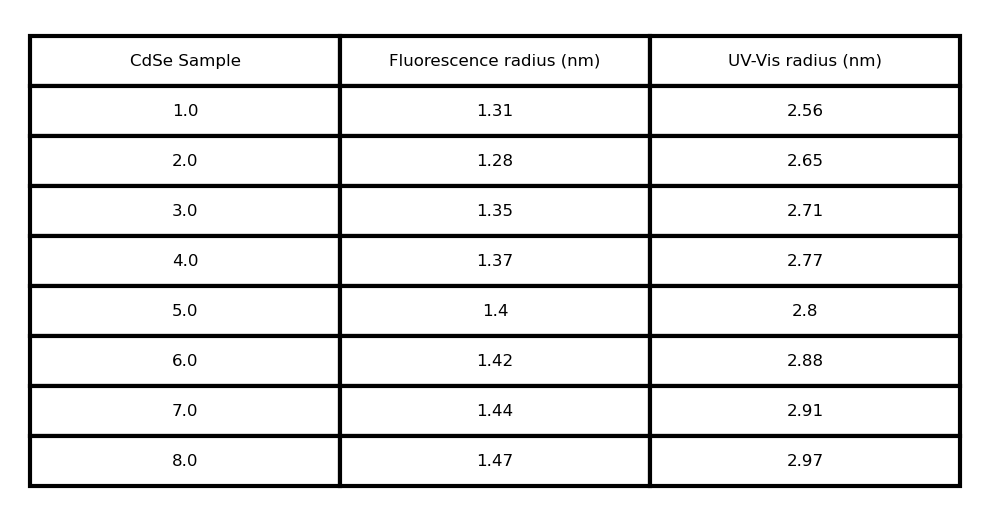

In [439]:
# Generate a comparison table for radii calculated by 2 approaches
dataSum = {"CdSe Sample": list(range(1,9)),
           "Fluorescence radius (nm)": radiFluoList,
           "UV-Vis radius (nm)": radiUVisList}      

df = pd.DataFrame(dataSum)

fig, ax = plt.subplots(figsize=(4, 2), dpi=300) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')     
plt.show() 

Text(0.5, 1.0, 'UV-Vis Data')

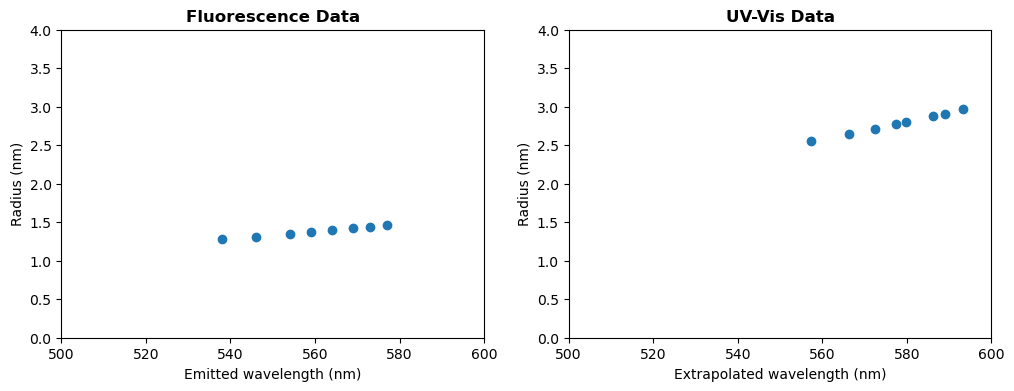

In [441]:
# Generate wavelength vs. radii plots for both approaches     
plt.figure(figsize=(12,4)) 
 
plt.subplot(1,2,1)
plt.scatter(waveLenMaxInt, radiFluoList)
plt.xlim(500,600)
plt.ylim(0,4)
plt.xlabel('Emitted wavelength (nm)')
plt.ylabel('Radius (nm)')
plt.title('Fluorescence Data',  fontweight='bold') 

plt.subplot(1,2,2)
plt.scatter(extraWaveLen, radiUVisList) 
plt.xlim(500,600)
plt.ylim(0,4)
plt.xlabel('Extrapolated wavelength (nm)')
plt.ylabel('Radius (nm)')
plt.title('UV-Vis Data', fontweight='bold') 

## VI. Discussions
The primary difference between the UV-Vis and Fluorescence approaches lies in what they measure. UV-Vis spectroscopy captures the energy required to excite an electron from the valence band to the conduction band (bandgap energy), while Fluorescence spectroscopy measures the energy emitted when the excited electron recombines with the hole (exciton binding energy). During this process, the electron undergoes both radiative and non-radiative relaxation, but only the radiative component is detected in fluorescence. As a result, the fluorescence approach may underestimate the quantum dot size, as it only reflects the energy from radiative emission. However, the precise, sharp emission peak provided by fluorescence is advantageous compared to the broader absorption peak observed in UV-Vis as an extrapolated wavelength from a linear fit can potentially reduce accuracy.